## Import the necessary libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

## Load in data

In [271]:
mush_df = pd.read_csv('data/02_mushroom_species_data.csv')
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Exploratory Data Analysis (EDA)
The .info() function allows us to view the data type of all columns, as well as the number of columns and rows. In this case, the current dataset has 23 columns and 8124 rows of records with all data types being categorical.

In [189]:
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [190]:
mush_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [191]:
mush_df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

#### Now, I will be looking at the distribution of values for the null data column.
Since the habitat column had some null values, I will be thinking of how to address these null values here. Firstly, I looked at the value counts for the different habitats available in the dataset. Then, a preview of which columns contained a NA habitat. 

In [192]:
mush_df['habitat'].value_counts()

habitat
woods      3148
grasses    2148
path       1144
leaves      832
urban       368
meadows     292
Name: count, dtype: int64

In [193]:
mush_df[mush_df['habitat'].isna()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,edible,convex,scaly,buff,bruises,none,free,close,broad,red,...,smooth,red,white,partial,white,two,evanescent,white,clustered,NaN
4283,edible,flat,smooth,pink,bruises,none,free,close,broad,red,...,smooth,white,white,partial,white,two,evanescent,white,clustered,NaN
4291,edible,knobbed,smooth,pink,bruises,none,free,close,broad,red,...,smooth,white,red,partial,white,two,evanescent,white,clustered,NaN
4357,edible,convex,smooth,red,bruises,none,free,close,broad,red,...,smooth,white,red,partial,white,two,evanescent,white,clustered,NaN
4380,edible,convex,scaly,buff,bruises,none,free,close,broad,red,...,smooth,white,red,partial,white,two,evanescent,white,clustered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,edible,flat,scaly,brown,bruises,none,free,close,broad,white,...,smooth,red,red,partial,white,two,evanescent,white,clustered,NaN
5953,edible,knobbed,smooth,red,bruises,none,free,close,broad,red,...,smooth,red,red,partial,white,two,evanescent,white,clustered,NaN
5961,edible,convex,scaly,brown,bruises,none,free,close,broad,white,...,smooth,red,white,partial,white,two,evanescent,white,clustered,NaN
5976,edible,knobbed,smooth,red,bruises,none,free,close,broad,red,...,smooth,white,white,partial,white,two,evanescent,white,clustered,NaN


#### Distribution of target variable class
From the graph below, we can see that the classes are not very balanced. Therefore, I will be addressing this issue in the pycaret set up later on.

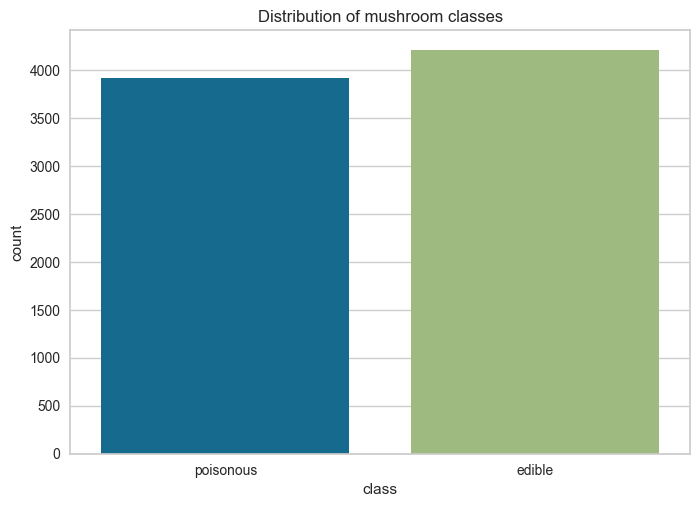

In [194]:
sns.countplot(data=mush_df, x='class', hue='class')
plt.title('Distribution of mushroom classes')
plt.show()

In [195]:
mush_df['class'].value_counts()

class
edible       4208
poisonous    3916
Name: count, dtype: int64

#### Renaming 'class' to 'poisonous'
This means that if the value is 1, the mushroom is poisonous. Otherwise, a value of 0 represents an edible mushroom.

In [235]:
mush_df = mush_df.rename(columns={'class':'poisonous'})
mush_df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


#### Correlation Analysis
Now, I will be doing correlation analysis with the use of a correlation matrix. First, I will temporarily label encode my categorical feature columns so that I will be able to use them to plot a correlation matrix.

It determine how strongly two variables are related. Positive correlations indicate that as one variable increases, the other tends to increase as well. Negative correlations indicate an inverse relationship, where one variable increases as the other decreases. This also helps to detect multicollinearity issues between features which are highly correlated to each other. In addition, it can also help us identify which features are highly correlated with the target variable, class, and which are not, which can help in feature selection.

To understand the matrix, the values closer to 1 (yellow) indicate a strong positive correlation whereas the values closer to -1 (purple) indicates a strong negative correlation.

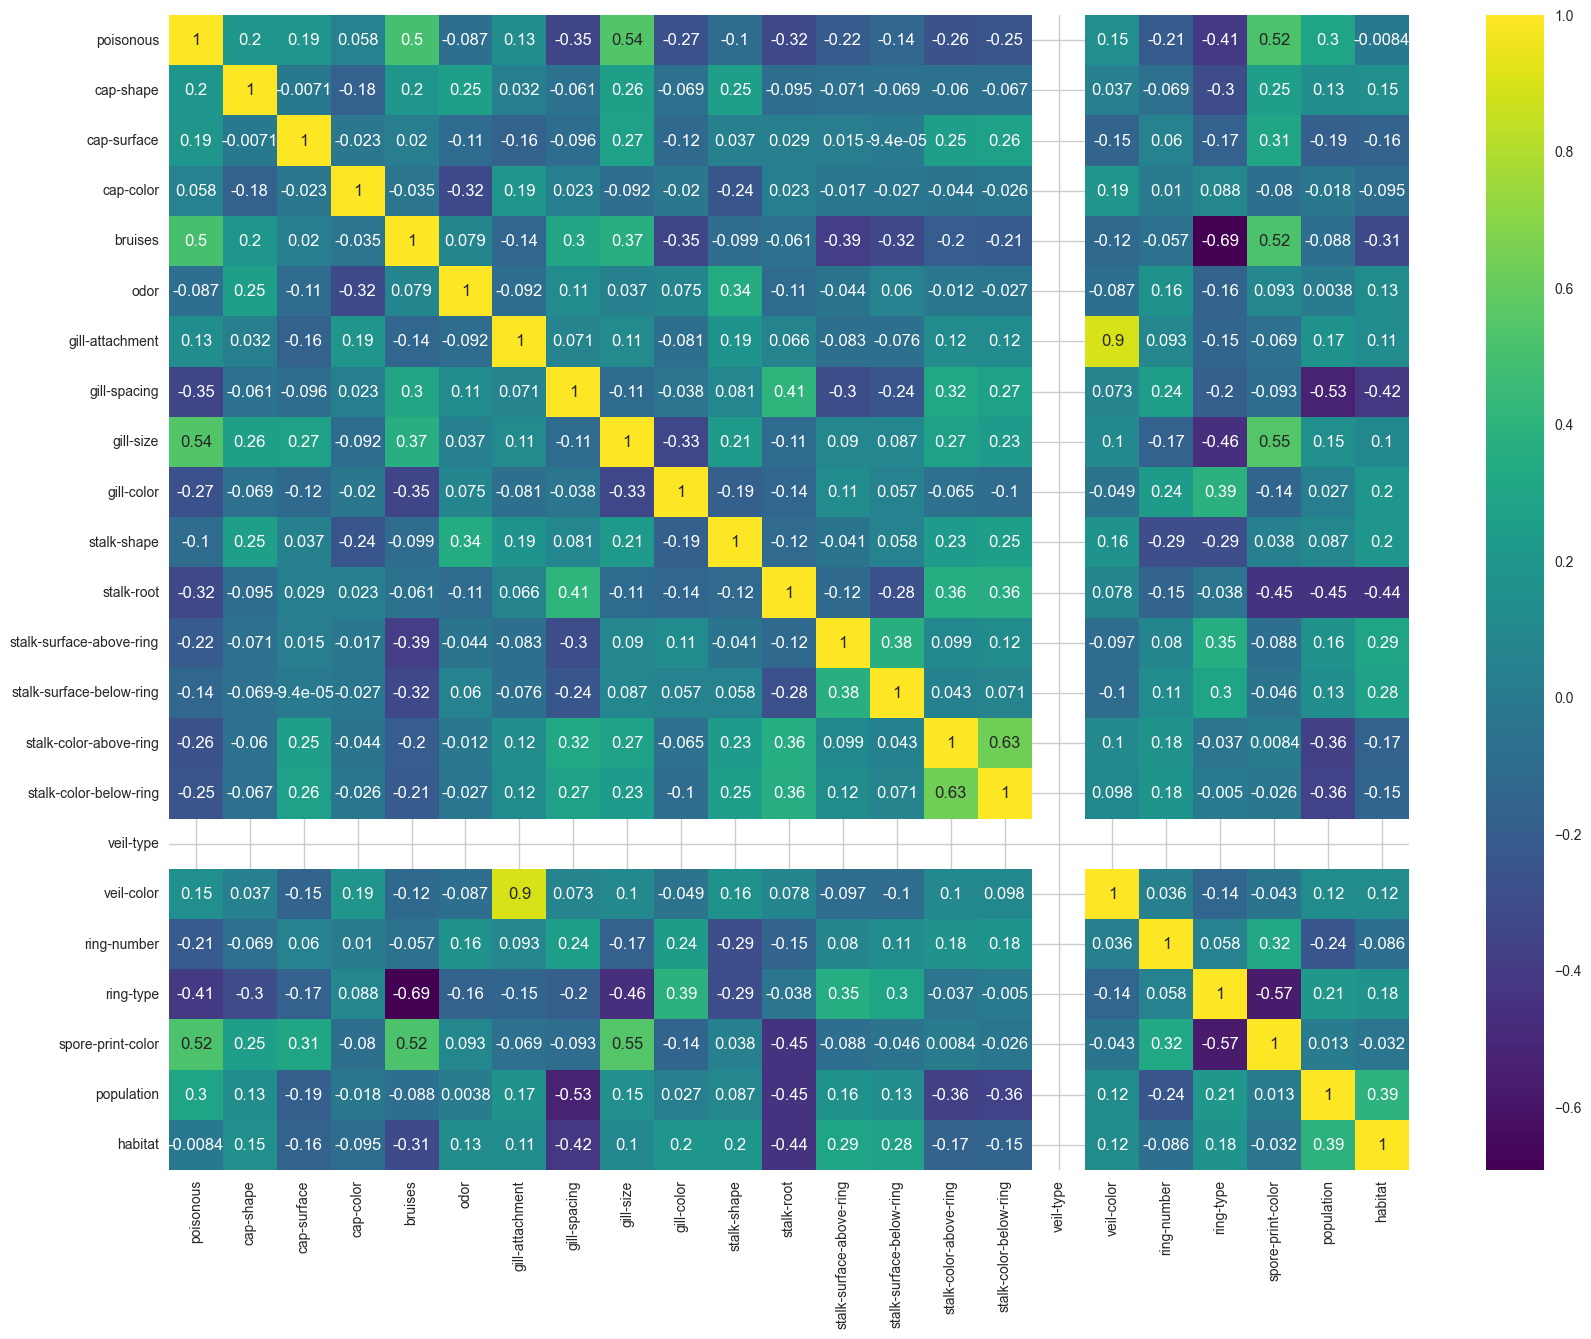

In [236]:
encoded_df_temp = mush_df.copy()

# getting features with object type, but excluding target variable
cat_cols = mush_df.select_dtypes(include = ['object']).columns

# encode values
le = LabelEncoder()
for col in cat_cols: 
    encoded_df_temp[col] = le.fit_transform(encoded_df_temp[col])
    
plt.figure(figsize = (20, 15))
sns.heatmap(encoded_df_temp.corr(), annot = True, cmap = 'viridis')
plt.show()

From the matrix above, we can see that the features which have an absolute correlation value of >= 0.50 with the target class are: 
- spore-print-color (0.52)
- gill-size (0.54)
- bruises (0.5)



Apart from that, we can also see that the gill-attachment feature has a pretty high correlation of 0.90 with veil-color, which indicates signs of multicollinearity issues.

In [237]:
encoded_df_temp.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


#### Distribution of Features grouped by Classes
Here, I have used a for loop to print out bar plots for each of the features, with the data separated by class. This allows me to have a better idea of how each feature affects whether or not the mushroom is edible or poisonous. 

##### Here are some insights that I have obtained from the barplots:
- more popular cap shapes are either convex or flat
- smooth and scaly cap surface mostly belong to poisonous mushrooms whereas fibrous belongs more to edible mushrooms
- edible mushrooms more freuent having a cap colour of brown, white or grey whereas poisonous mushrooms more frequent yellow or red
- mushrooms with bruises are usually edible whereas those without are mostly poisonous
- mushrooms with a foul odor are very likely poisonous whereas mushrooms with no odor are mostly edible
- mushrooms with a broad gill size is usually edible whereas those with narrow gill sizes tend to be poisonous
- generally, a black or white gill colour indicates an edible mushroom whereas a buff gill colour mostly belongs to a poisonous mushroom
- rooted and club stalk roots are mostly edible while most poisonous mushrooms have bulbous stalk roots
- edible mushrooms usually have smooth stalk surfaces whereas poisonous mushrooms usually have silky stalk surfaces
- A white stalk colour mostly belong to edible mushrooms while pink mostly belong to poisonous mushrooms
- there is only 1 veil type and its partial
- mushrooms usually have a veil-color of white as well as ring number of 1 so this may not be very helpful in determining which class a mushroom belongs to
- a pendant ring type usually indicates an edible mushroom whereas a large or evanscent ring type usually belongs to a poisonous mushroom
- black or brown spore print usually indicates an edible mushroom while chocolate or white spore print indicates a posionous mushroom
- poisonous mushrooms usually have several populations
- mushrooms spotted in meadows are most likely edible whereas mushrooms in paths, urban areas or leaves tend to be poisonous

Although these insights can be gathered here, this information alone is not enough to determine a mushroom's consumability. Therefore, with the use of a model, it can learn all these characteristics and gather more specific insights through joining connections between every singe feature.

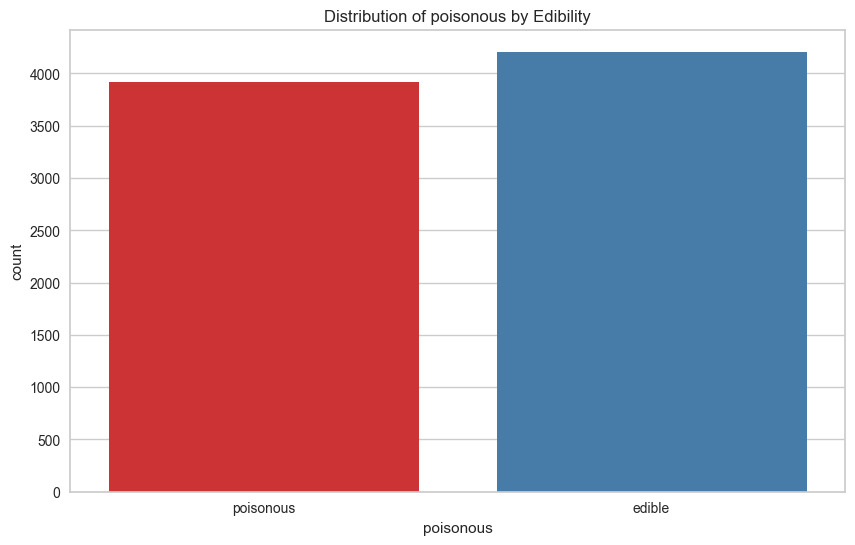

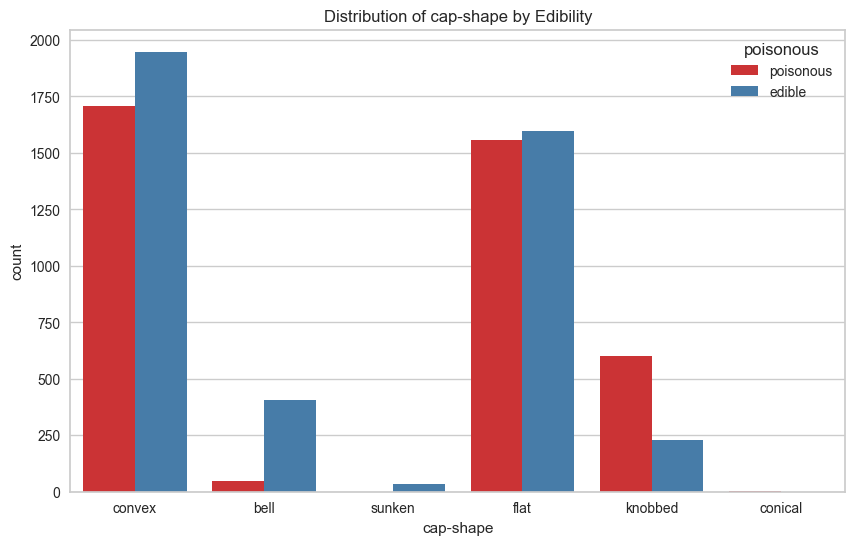

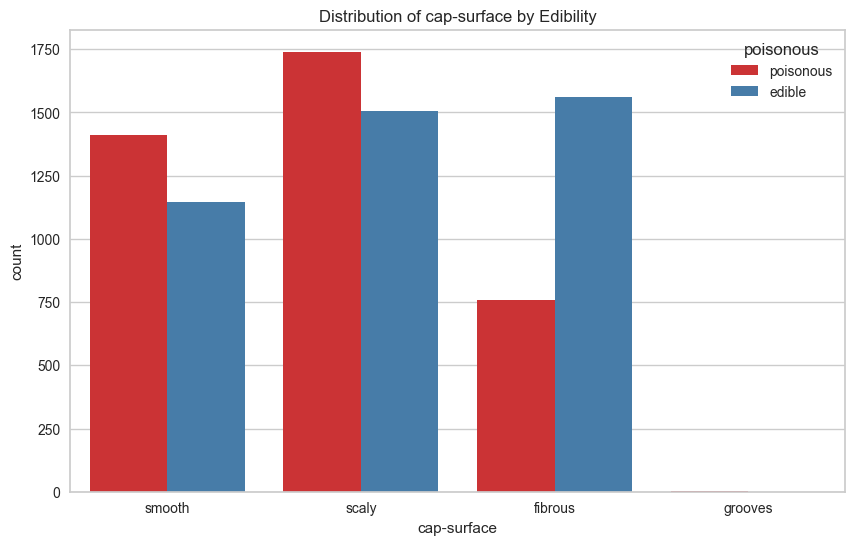

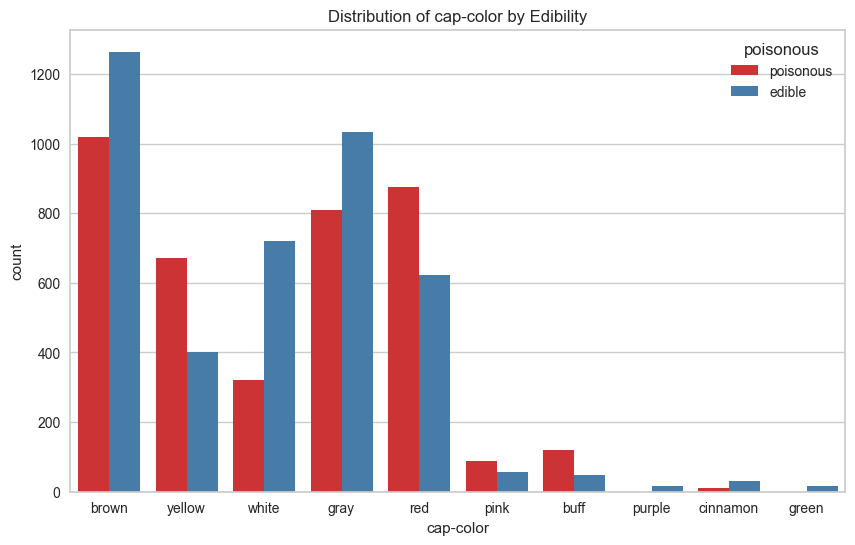

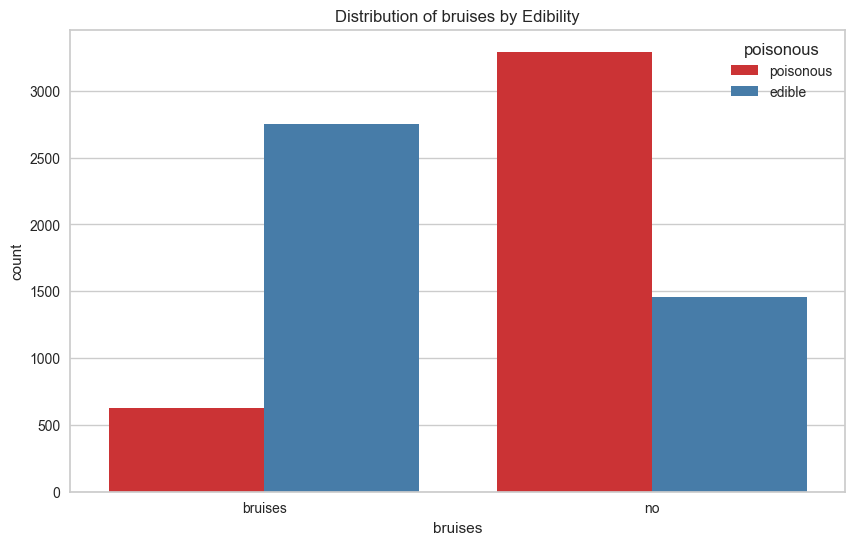

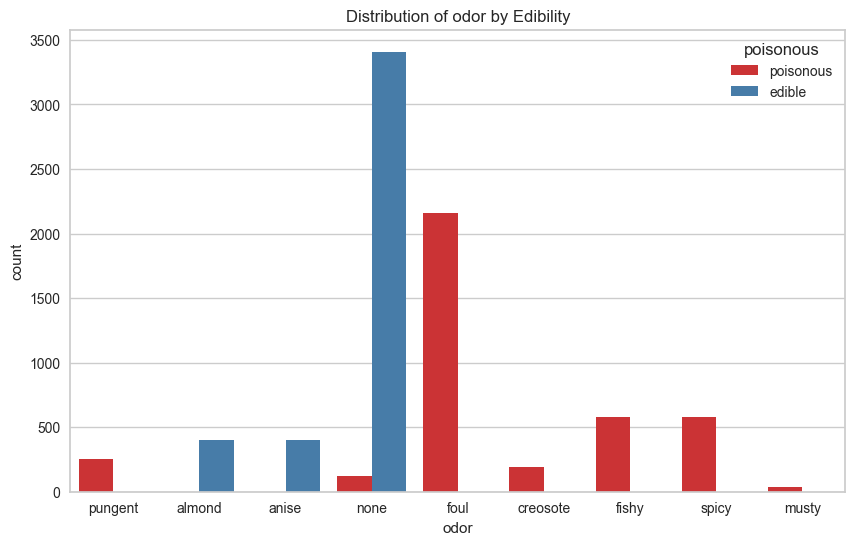

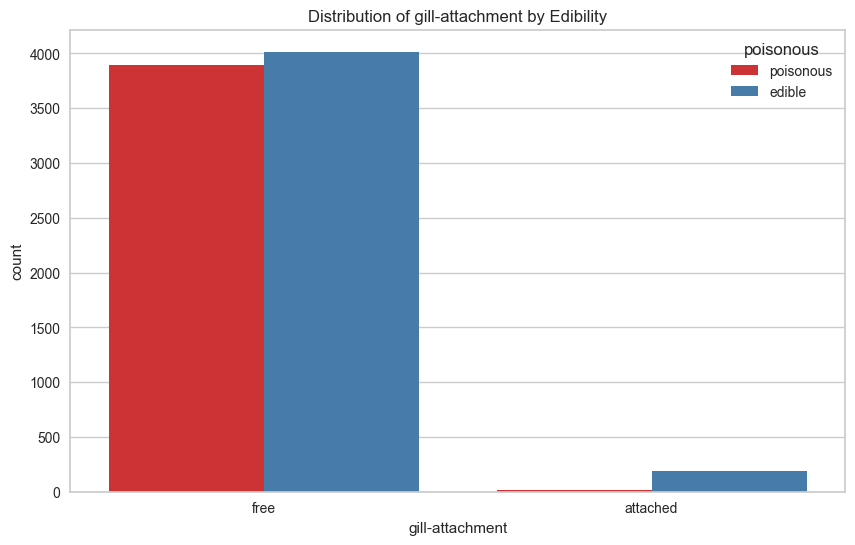

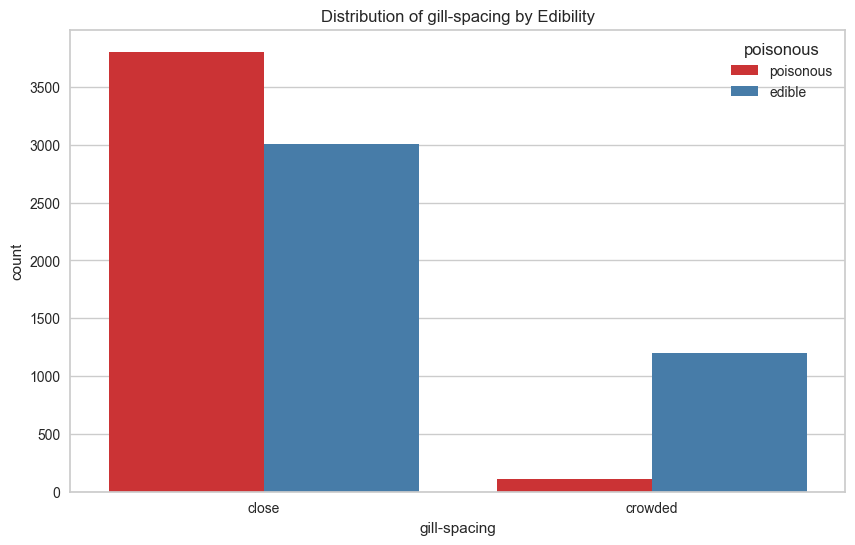

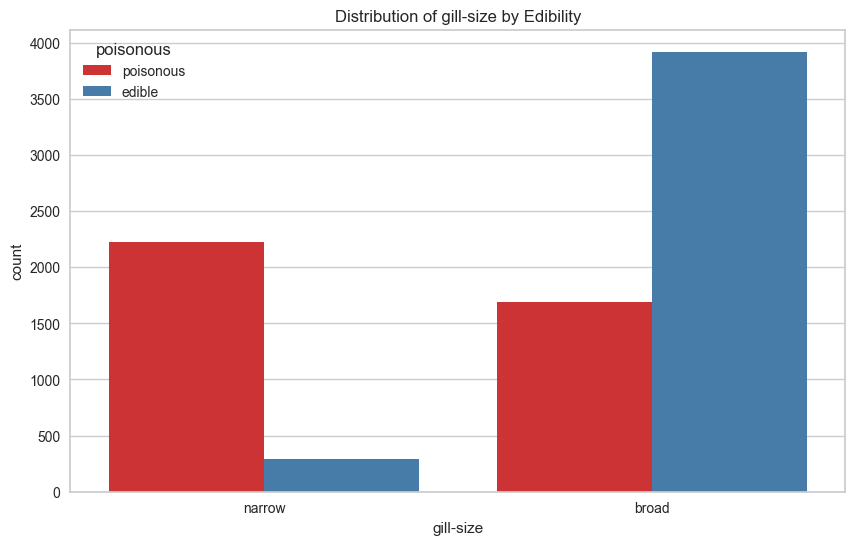

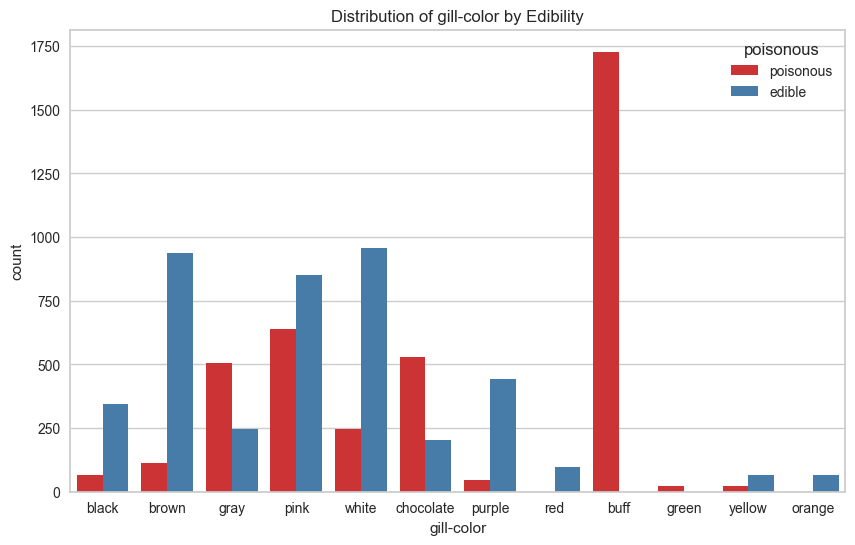

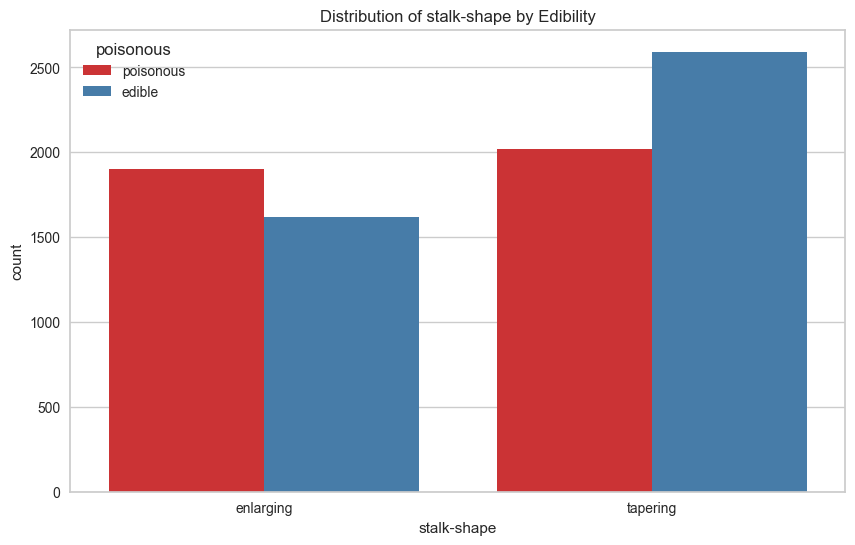

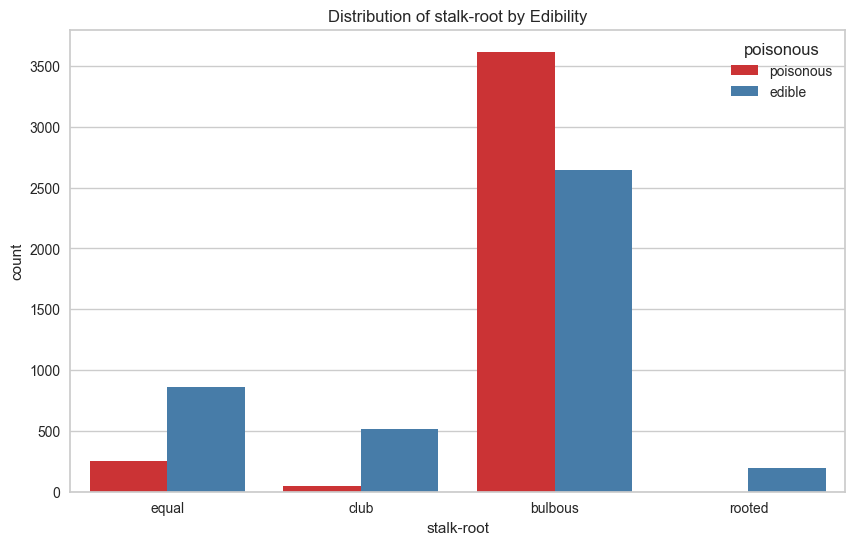

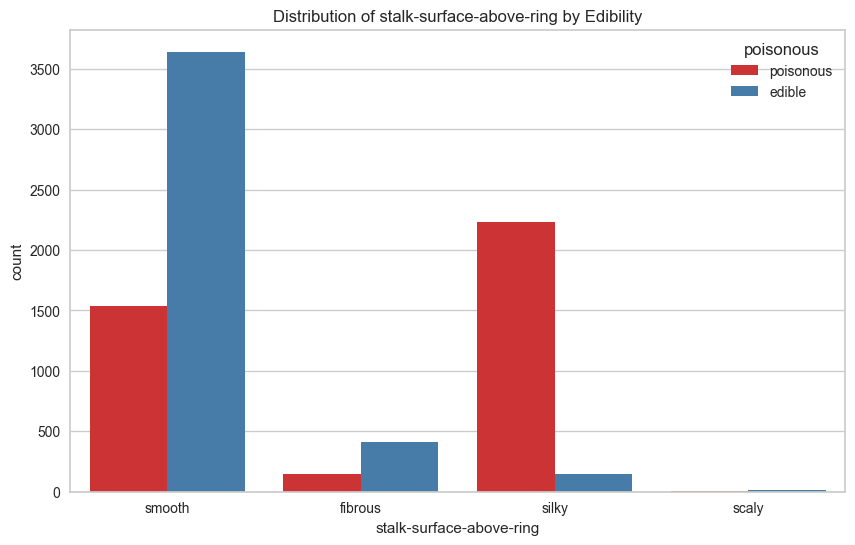

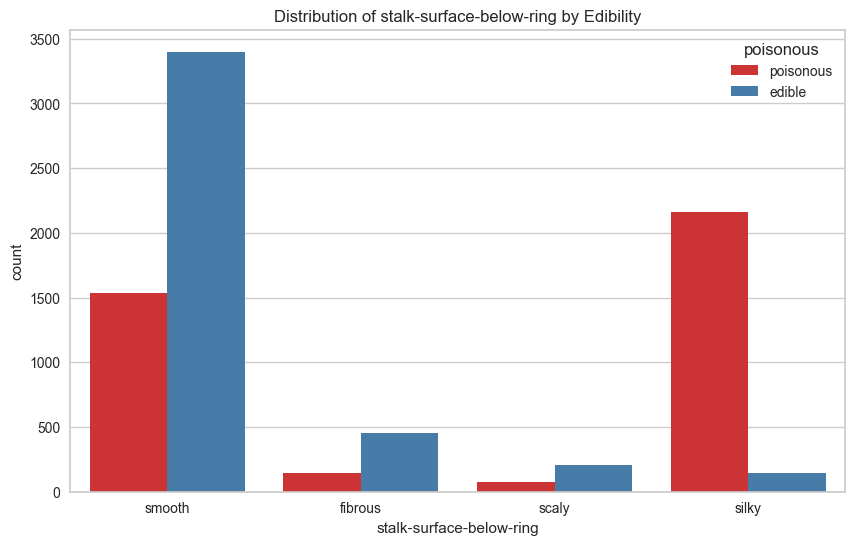

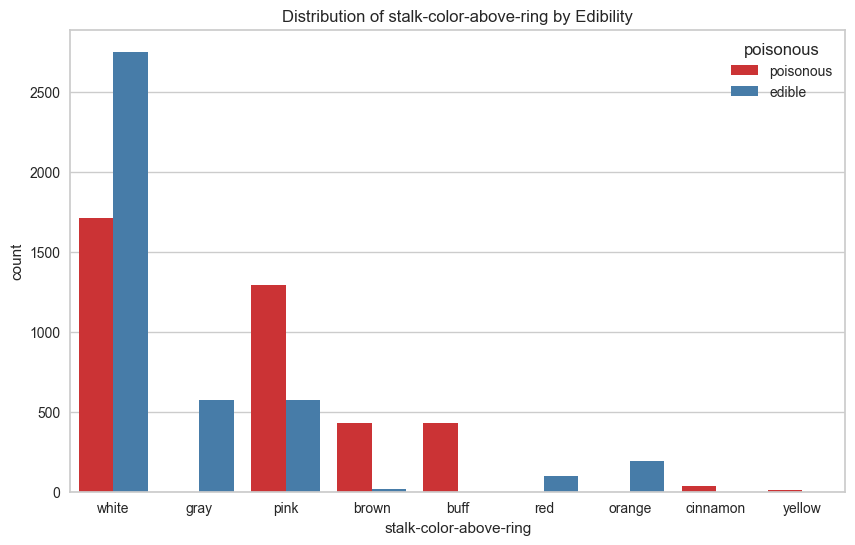

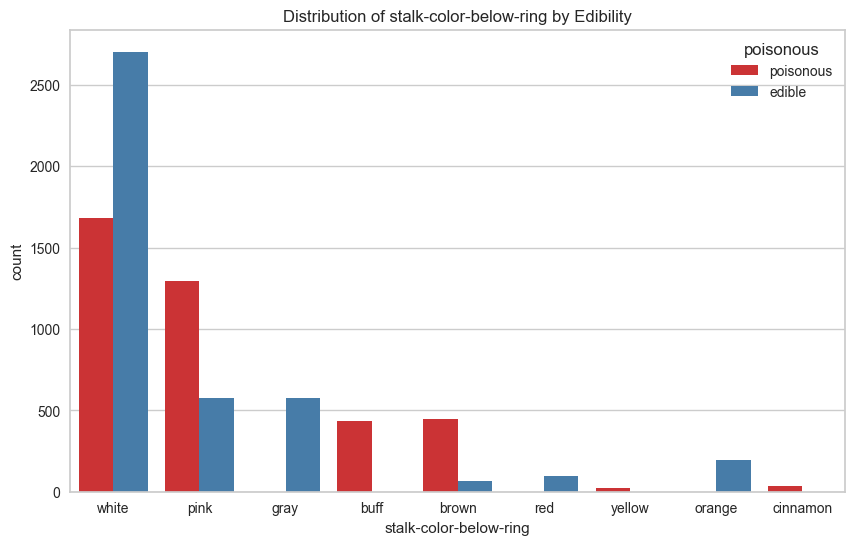

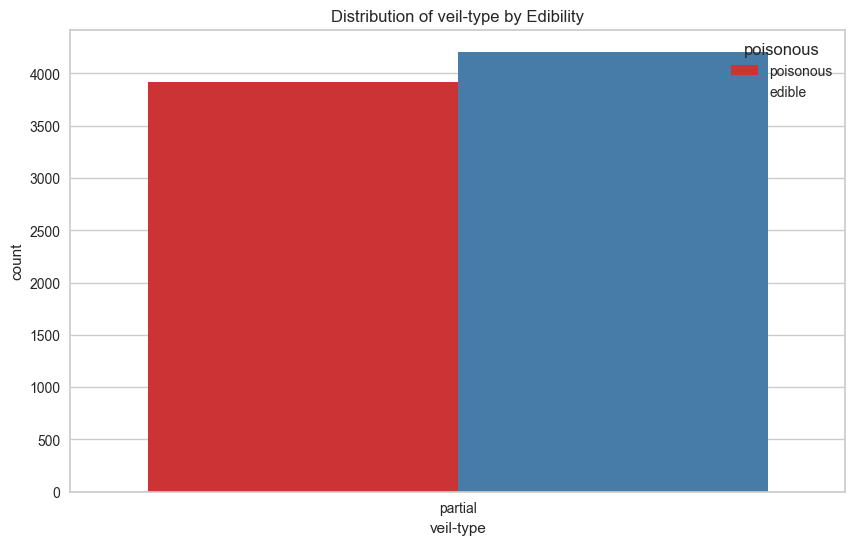

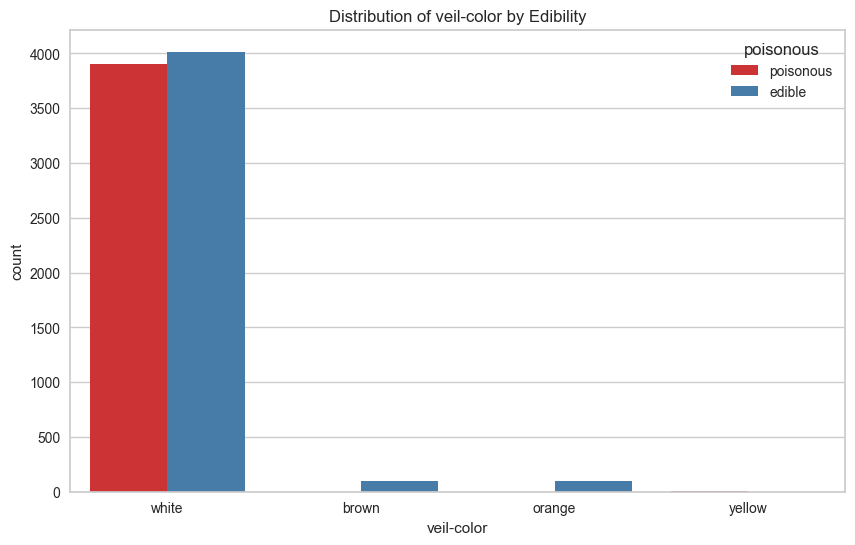

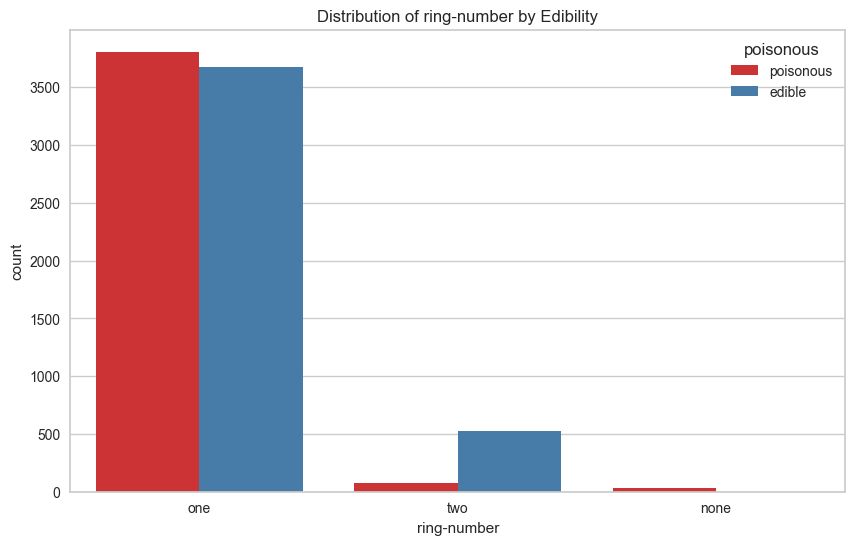

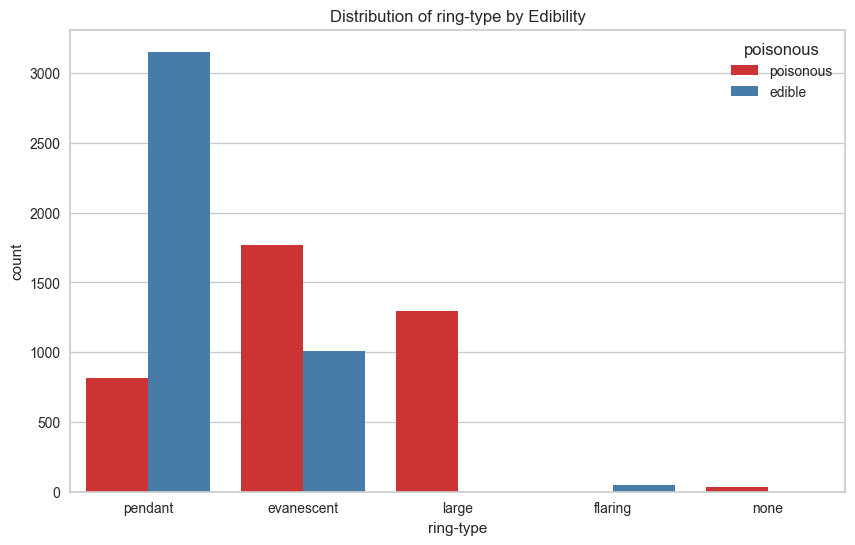

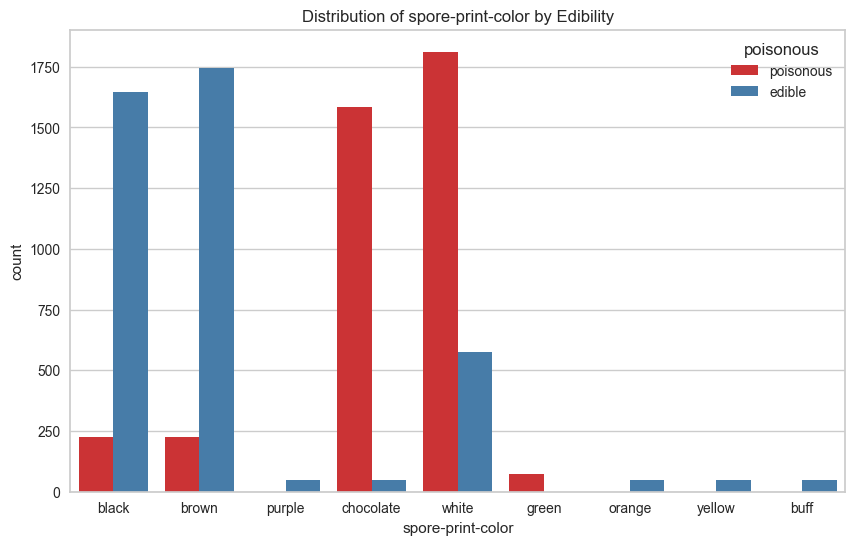

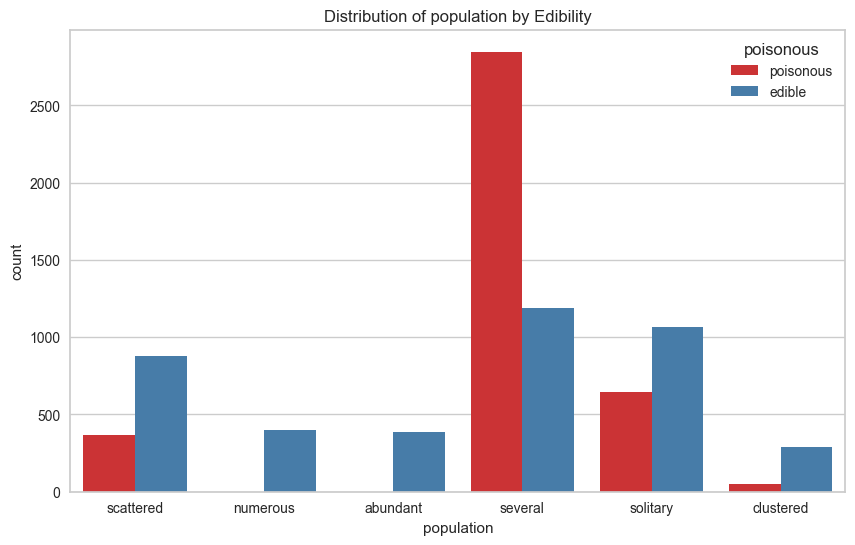

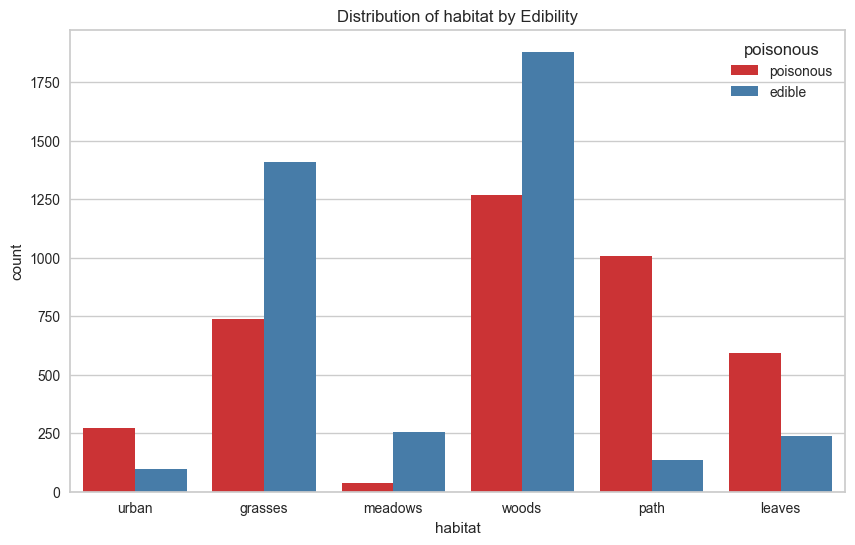

In [238]:
# Calculate frequency counts
for column in mush_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=mush_df, x=column, hue='poisonous', palette='Set1')
    plt.title(f'Distribution of {column} by Edibility')
    plt.show()

### Pre-processing BEFORE set up in pycaret
This is done as some of these steps cannot be done by the pycaret setup function.

#### Label Encoding categorical features 
I will be label encoding all the columns because all of our features are actually categorical variables. This process allows us to better understand how much impact each of the features have on the target variable, class. The label encoding is done outside the set up function as set up function only offers one-hot encoding, but for my classification task, label encoding has proven to be more efficient and value-adding to the model. Hence, I am doing it manually outside the set up function.

Afterwhich, I will be saving the label encoder as a pickle file and implement it during my flask process later on. 

In [239]:
encoded_df = mush_df.copy()

# getting features with object type, but excluding target variable
cat_cols = mush_df.select_dtypes(include = ['object']).columns
cat_cols = cat_cols.drop('poisonous')

# create a dict to store label encoders
label_encoders = {}

# encode values
for col in cat_cols: 
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

In [240]:
encoded_df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,edible,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,edible,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,poisonous,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,edible,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [266]:
# Check label encoder dict
# Print out the classes for each label encoder
for col, le in label_encoders.items():
    print(f"Label encoder for '{col}' has classes: {le.classes_}")

Label encoder for 'cap-shape' has classes: ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken']
Label encoder for 'cap-surface' has classes: ['fibrous' 'grooves' 'scaly' 'smooth']
Label encoder for 'cap-color' has classes: ['brown' 'buff' 'cinnamon' 'gray' 'green' 'pink' 'purple' 'red' 'white'
 'yellow']
Label encoder for 'bruises' has classes: ['bruises' 'no']
Label encoder for 'odor' has classes: ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy']
Label encoder for 'gill-attachment' has classes: ['attached' 'free']
Label encoder for 'gill-spacing' has classes: ['close' 'crowded']
Label encoder for 'gill-size' has classes: ['broad' 'narrow']
Label encoder for 'gill-color' has classes: ['black' 'brown' 'buff' 'chocolate' 'gray' 'green' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow']
Label encoder for 'stalk-shape' has classes: ['enlarging' 'tapering']
Label encoder for 'stalk-root' has classes: ['bulbous' 'club' 'equal' 'rooted']
Label encoder for 'stalk-s

In [241]:
# Save the label encoders
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

#### Train-Test Split
Here, I will be splitting out 10% of the data to be kept as unseen test set and 90% for training to be sent into the pycaret set up function.

In [242]:
X = encoded_df_temp.drop('poisonous', axis=1)
y = encoded_df_temp['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [243]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7311, 22), (813, 22), (7311,), (813,))

In [244]:
train_encoded = pd.concat([y_train, X_train], axis=1)

In [245]:
train_encoded.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4750,1,3,0,9,1,4,1,0,0,4,...,2,5,1,0,2,1,2,3,4,5
3026,1,2,0,5,1,2,1,1,1,8,...,3,7,7,0,2,1,4,0,3,5
3757,0,3,0,7,0,6,1,0,0,1,...,3,3,3,0,2,1,4,0,4,5
6167,1,3,3,7,1,3,1,0,1,2,...,2,5,7,0,2,1,0,7,4,3
6281,1,2,3,7,1,3,1,0,1,2,...,3,5,7,0,2,1,0,7,4,1


## Set Up PyCaret
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. 

Within the set up function, I have specified some additional preprocessing tasks to be applied to the dataset such as:
- train_size=0.8 means 80% training set and 20% test set
- simple imputation type with mean numeric imputation to tackle missing values by replacing them with the mean value
- fix_imbalance=True to ensure target variable 'class' column is balanced with SMOTE
- remove_multicollinearity=True helps to reduce redundancy in the features and improves model stability by removing highly correlated features
- remove_outliers=True allows for automatic outlier detection and removal from the data
- feature_selection=True means that pycaret will select the top 4 most important features based on model performance
- normalize=True scales the features to have a mean of 0 and standard deviation of 1

Since setup function only automaticlly encodes with one hot encoding, I have done label encoding above in my EDA under the correlation matrix portion. Now, I will reference to the encoded dataset for my set up.

In [19]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [148]:
from pycaret.classification import *

In [246]:
mush_le = setup(data=train_encoded, 
                target='poisonous', 
                session_id = 123, 
                log_experiment=True, 
                experiment_name='mushroom_edibility',
                preprocess=True, 
                imputation_type='simple',
                numeric_imputation='mean', 
                fix_imbalance=True, 
                remove_multicollinearity=True, 
                feature_selection=True,
                remove_outliers=True,  
                normalize=True)

,Description,Value
0,Session id,123
1,Target,poisonous
2,Target type,Binary
3,Original data shape,"(7311, 23)"
4,Transformed data shape,"(7068, 5)"
5,Transformed train set shape,"(4874, 5)"
6,Transformed test set shape,"(2194, 5)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [247]:
# Check for all available configurations
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [248]:
# Have a look at what the pre-processed dataset looks like
mush_le.get_config('dataset_transformed')

,cap-shape,cap-color,odor,habitat,poisonous
4747,0.574001,1.356060,-0.395650,0.039547,1
4745,0.574001,1.356060,-0.395650,0.970715,1
3622,-0.591437,-0.400290,-0.395650,0.039547,1
4367,0.574001,-0.400290,-0.395650,0.970715,1
3056,0.574001,-1.278464,0.612927,0.970715,0
...,...,...,...,...,...
4201,0.574001,-0.400290,-0.395650,0.039547,1
3981,-0.591437,0.185160,-1.404228,0.970715,1
5488,0.574001,1.356060,-0.395650,0.039547,1
7453,1.739439,-1.278464,-0.395650,0.970715,1


## Model training and Evaluation
### Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. With this, I will be able to identify which is the best model for my classification task.

From the results, I can see that the best performing model is the random forest classifier.
- With a high accuracy of 0.9826, this means that it correctly classified the edibility of 98.26% of the mushrooms in the dataset.
- An AUC of 0.9955 indicates an excellent model performance in distinguishing whether the mushroom was poisonous or not.
- A recall of 0.9806 indicates that the model correctly identified 98.06% of the positive instances (poisonous). This suggests that the model has a strong ability to detect poisonous mushrooms.
- The precision of 0.9834 indicates that when the model predicted a poisonous msuhroom, it was correct 98.34% of the time. This means there are very few false positives.
- The F1 score is the harmonic mean of precision and recall. A score of 0.9820 indicates a strong balance between precision and recall, making the model reliable in predicting both positive (poisonous) and negative (edible) cases.
- Cohen's Kappa of 0.9651 measures the agreement between the model's predictions and the true labels, accounting for the possibility of random guessing. A Kappa value of 0.9651, which is close to 1 suggests an almost perfect agreement with the predictions.
- A high MCC of 0.9652 indicates a strong correlation between the observed and predicted classifications.

In [249]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9826,0.9955,0.9806,0.9834,0.9820,0.9651,0.9652,0.3220
xgboost,Extreme Gradient Boosting,0.9822,0.9952,0.9794,0.9838,0.9815,0.9644,0.9644,0.3560
catboost,CatBoost Classifier,0.9820,0.9951,0.9794,0.9834,0.9814,0.9640,0.9640,1.4820
dt,Decision Tree Classifier,0.9816,0.9922,0.9806,0.9814,0.9810,0.9632,0.9632,0.2120
et,Extra Trees Classifier,0.9816,0.9958,0.9770,0.9851,0.9809,0.9632,0.9633,0.2960
lightgbm,Light Gradient Boosting Machine,0.9816,0.9940,0.9774,0.9847,0.9809,0.9632,0.9633,0.2690
gbc,Gradient Boosting Classifier,0.9789,0.9936,0.9713,0.9846,0.9777,0.9577,0.9580,0.2700
knn,K Neighbors Classifier,0.9722,0.9871,0.9721,0.9706,0.9712,0.9444,0.9447,0.2450
ada,Ada Boost Classifier,0.9710,0.9879,0.9668,0.9734,0.9701,0.9420,0.9421,0.2610
qda,Quadratic Discriminant Analysis,0.8263,0.8592,0.8356,0.8145,0.8234,0.6526,0.6552,0.2090


In [250]:
# Getting the best model's parameters
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

#### Tuning the model
Here, I have tried to tune the model to obtain best hyperparameters for the model. However, the output showed that the tuned model did not perform as well as the original model, with the mean accuracy dropping from 98.26 to 97.09. Therefore, I will be moving forward with the original untuned model instead.

In [251]:
tuned_model = tune_model(best, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9785,0.9983,0.9758,0.9798,0.9778,0.9570,0.9570
1,0.9844,0.9990,0.9718,0.9959,0.9837,0.9687,0.9690
2,0.9824,0.9980,0.9637,1.0000,0.9815,0.9648,0.9654
3,0.9902,0.9995,0.9879,0.9919,0.9899,0.9804,0.9805
4,0.9844,0.9912,0.9677,1.0000,0.9836,0.9687,0.9692
5,0.9863,0.9984,0.9798,0.9918,0.9857,0.9726,0.9727
6,0.9824,0.9928,0.9636,1.0000,0.9814,0.9648,0.9654
7,0.9276,0.9734,0.9271,0.9234,0.9253,0.8550,0.8551
8,0.9980,0.9997,0.9960,1.0000,0.9980,0.9961,0.9961


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [252]:
# Create the random forest model (best model)
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9961,0.9999,0.9919,1.0000,0.9960,0.9922,0.9922
1,0.9961,1.0000,1.0000,0.9920,0.9960,0.9922,0.9922
2,0.9902,0.9994,0.9839,0.9959,0.9899,0.9804,0.9805
3,0.9902,0.9979,0.9960,0.9841,0.9900,0.9805,0.9805
4,0.9902,0.9992,0.9798,1.0000,0.9898,0.9804,0.9806
5,0.9883,0.9955,0.9838,0.9918,0.9878,0.9765,0.9766
6,0.9961,1.0000,0.9919,1.0000,0.9959,0.9922,0.9922
7,0.9491,0.9824,0.9514,0.9438,0.9476,0.8982,0.8982
8,0.9961,1.0000,1.0000,0.9920,0.9960,0.9922,0.9922


#### ROC Curve
The ROC curve below shows that the classifier is performing exceptionally well for both classes as they hug the top left corner of the plot. This means that the model is extremely effective in distinguishing whether a mushroom is poisonous or not. The AUC for both classes is 1 which confirms that the classifiers performs perfect classification with little to no errors.

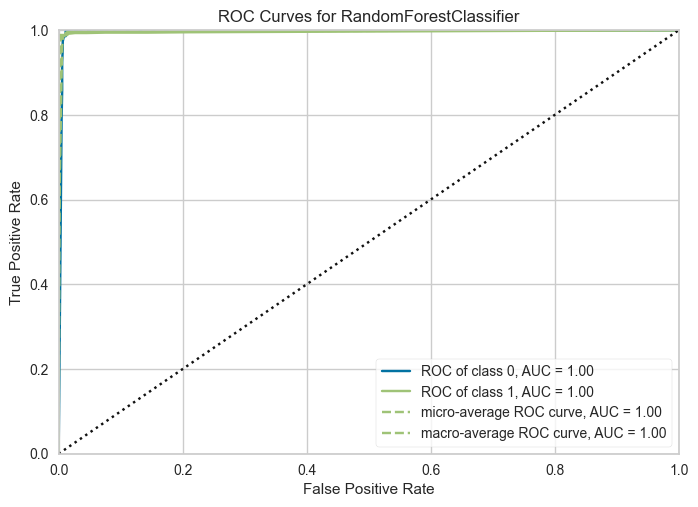

In [253]:
plot_model(rf)

### Error plot
The error plot below shows that the model correctly classifies majority of the classes, with very little incorrectly classified edibility for 0 (edible) and 1 (poisonous) meaning that there is little to no error in its classification.

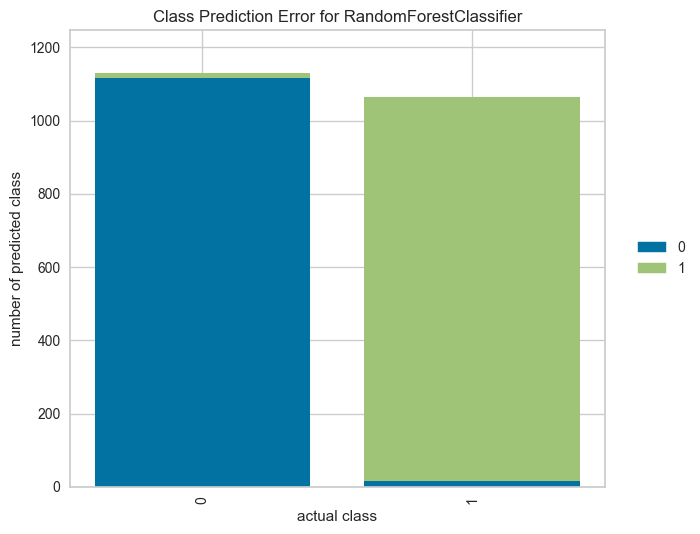

In [254]:
plot_model(rf, plot='error')

### Confusion matrix
The confusion matrix shows that majority of the model's classifications were correct with a large number of true positives (1 - poisonous) and true negatives (0 - edible)of 1049 and 1117 respectively. 

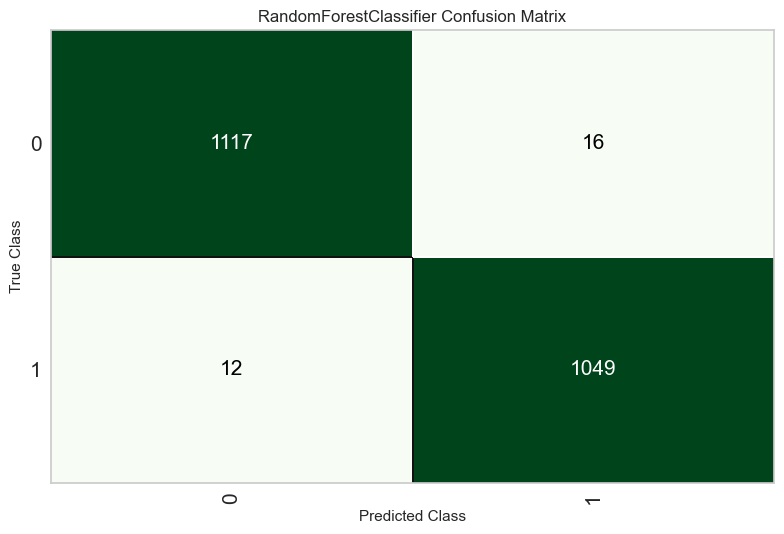

In [255]:
plot_model(rf, plot='confusion_matrix')

### Feature selection plot
The plot shows that having 4 features selected returns the highest accuracy score of 0.996. Therefore, during the set up function, the transformed dataset has 4 features included for training. These 4 selected features were chosen from the top 4 most influential features in predicting the target variable.

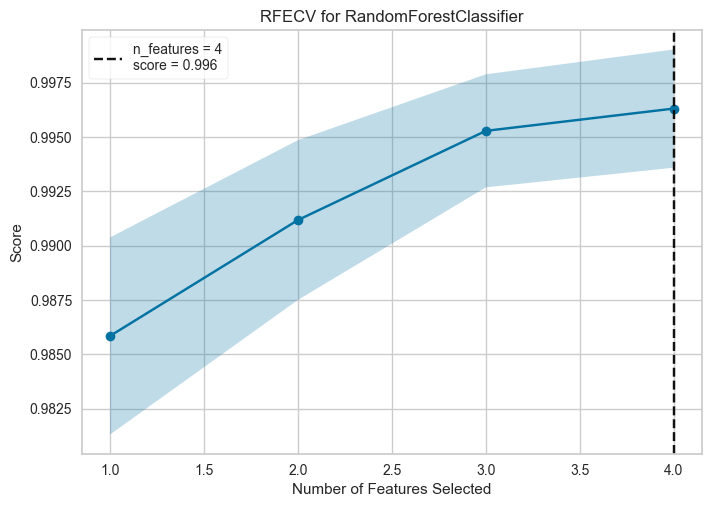

In [256]:
plot_model(rf, plot='rfe')

### Learning curve
From the learning curve below, it can be seen that the training and cross validation scores across the training instances remain quite close to each other. The converges of the 2 curves to a similar value at the end of the training instances with a pretty high accuracy at the 0.9 range indicates that the model is generalizing well and not overfitting or underfitting.

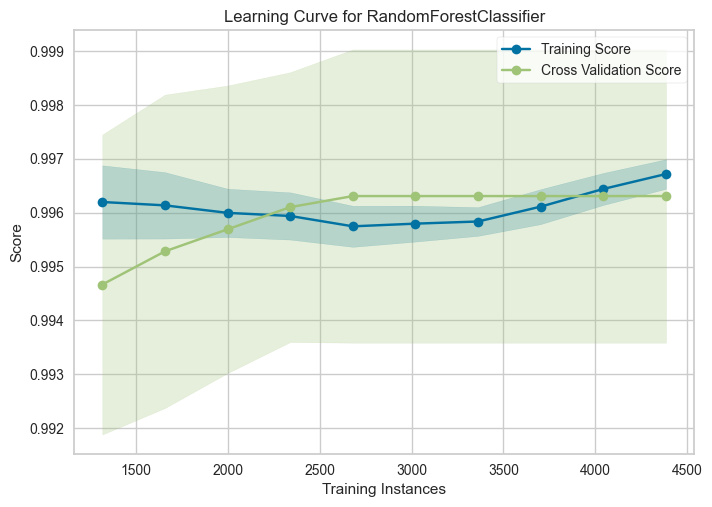

In [257]:
plot_model(rf, plot='learning')

### Manifold learning plot
Looking at the manifold learning plot, we can observe distinct clusters of data points, which suggests that the manifold learning algorithm has successfully reduced the dimensionality while preserving the intrinsic structure of the data. 

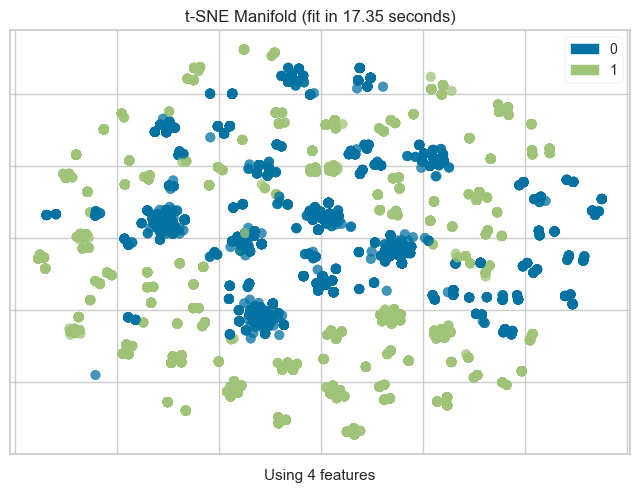

In [258]:
plot_model(rf, plot='manifold')

### Lift curve
Looking at the lift curve, we can observe that targeting the top 50% of the mushroom data ranked by the model results in a lift of 1.9 for the edible class and 2.1 for the poisonous class. This means that the top 50% of the data, as identified by the model, is 1.9 times more likely to be classified as edible and 2.1 times more likely to be classified as poisonous compared to a random sample. As we move further along the axis, the lift gradually decreases but remains above 1. This indicates that the model is highly effective in identifying the most relevant samples, showing a consistent ability to distinguish between edible and poisonous mushrooms effectively.



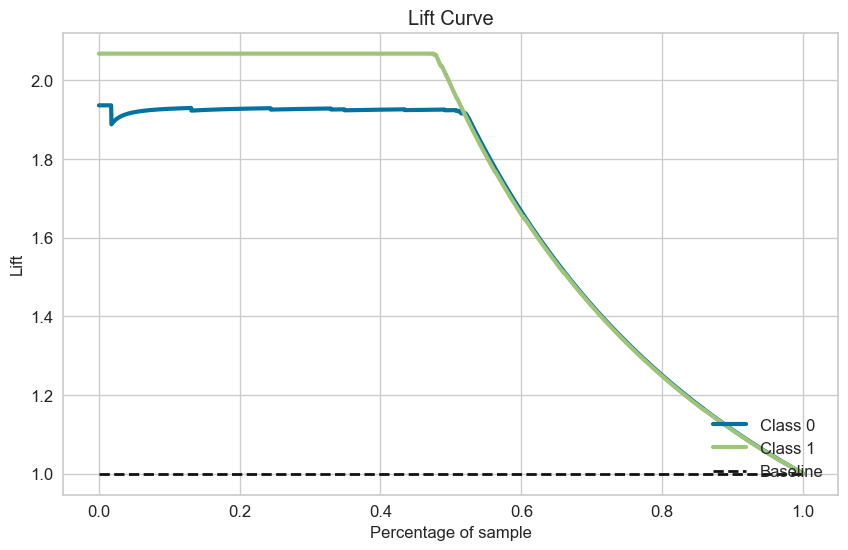

In [259]:
plot_model(rf, plot='lift')

In [260]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Generate Predictions 
From the predict_model() function, I can see that the model's test accuracy has improved from the training accuracy from 98.26% to 98.72%. This means that the model is performing extremely well in making its predictions on whether or not a mushroom is poisonous.

In [261]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9872,0.9968,0.9887,0.9850,0.9868,0.9745,0.9745


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous,prediction_label,prediction_score
2682,3,0,0,0,6,1,0,0,8,1,...,0,2,1,4,0,4,5,0,0,0.9785
3282,2,3,5,1,2,1,1,1,7,0,...,0,2,1,4,0,4,5,1,1,1.0000
6149,3,3,0,1,8,1,0,1,2,1,...,0,2,1,0,7,4,3,1,1,1.0000
3115,3,2,0,0,6,1,0,0,7,1,...,0,2,1,4,0,5,5,0,0,0.9785
2474,2,2,3,0,6,1,0,0,7,1,...,0,2,1,4,1,5,5,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,3,0,3,1,4,1,0,0,4,0,...,0,2,1,2,3,5,3,1,1,1.0000
3981,2,0,5,1,2,1,1,1,7,0,...,0,2,1,4,0,4,5,1,1,1.0000
5488,3,2,9,1,4,1,0,0,4,0,...,0,2,1,2,3,4,3,1,1,1.0000
7453,4,2,0,1,4,1,0,1,2,1,...,0,2,1,0,7,4,5,1,1,1.0000


### Testing predictions on Unseen data
Here, I have used the dataset which I have saved from the train test split above to simulate how the model would perform on unseen data. This dataset, X_test does not contain any labels therefore this can be used for scoring. From the dataframe of top5 and bottom5 data records obtained a prediction score of 1, which implies that the prediction was correctly and confidently done.

In [262]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,3,0,0,1,6,1,1,0,3,1,...,0,7,7,0,2,1,0,1,3,0
6654,3,3,7,1,3,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,1
5606,2,2,0,1,4,1,0,1,2,1,...,3,7,5,0,2,1,0,7,4,1
3332,3,2,3,0,6,1,0,0,1,1,...,3,3,5,0,2,1,4,1,5,5
6988,3,3,7,1,8,1,0,1,2,1,...,3,5,5,0,2,1,0,7,4,1


In [263]:
pred = predict_model(rf, data=X_test)
pred

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,prediction_label,prediction_score
1971,3,0,0,1,6,1,1,0,3,1,...,7,0,2,1,0,1,3,0,0,1.0
6654,3,3,7,1,3,1,0,1,2,1,...,5,0,2,1,0,7,4,1,1,1.0
5606,2,2,0,1,4,1,0,1,2,1,...,5,0,2,1,0,7,4,1,1,1.0
3332,3,2,3,0,6,1,0,0,1,1,...,5,0,2,1,4,1,5,5,0,1.0
6988,3,3,7,1,8,1,0,1,2,1,...,5,0,2,1,0,7,4,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,2,2,0,0,0,1,0,0,1,0,...,7,0,2,1,4,1,5,0,0,1.0
5789,0,3,5,0,6,1,0,0,10,0,...,7,0,2,2,4,4,4,2,1,1.0
5634,2,2,7,1,3,1,0,1,2,1,...,5,0,2,1,0,7,4,3,1,1.0
1025,3,2,8,0,7,1,0,1,7,0,...,7,0,2,1,4,1,3,0,1,1.0


## Save the pipeline
Here, I will be saving the transformation pipeline and trained classification model object into the current working directory as a pickle file for later use.

In [264]:
save_model(rf, 'mushroom_edibility_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cap-shape', 'cap-surface',
                                              'cap-color', 'bruises', 'odor',
                                              'gill-attachment', 'gill-spacing',
                                              'gill-size', 'gill-color',
                                              'stalk-shape', 'stalk-root',
                                              'stalk-surface-above-ring',
                                              'stalk-surface-below-ring',
                                              'stalk-color-above-ring',
                                              'stalk-color-below-ring'...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_

In [265]:
# Load the entire pipeline
mushroom_pipeline = load_model('mushroom_edibility_classification')

# Save it using pickle
with open('mushroom_pipeline.pkl', 'wb') as file:
    pickle.dump(mushroom_pipeline, file)

Transformation Pipeline and Model Successfully Loaded


## Register the model with MLFlow
The following command starts the MLflow tracking server's user interface (UI), which allows us to visualize and manage our machine learning experiments. <br>
Access the mlflow with the following address: **localhost:5000**

In [1]:
!mlflow ui

^C


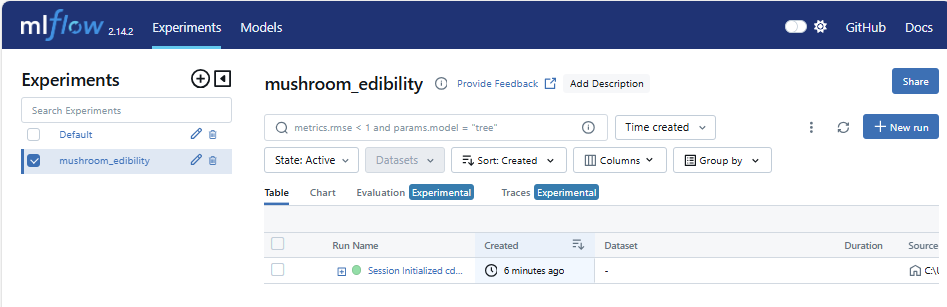

### Build and deploy web application
Now, I'll be moving over to Visual Studio Code where I will be working on the front and back end application development before deployment with Render.